# 10.05 Homework №1: clustering and classification of 20newsgroup dataset

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Загрузка датасета:

In [125]:
from sklearn.datasets import fetch_20newsgroups_vectorized
dataset = fetch_20newsgroups_vectorized(subset='all')
X = dataset.data
y = dataset.target
y_names = dataset.target_names
X.shape, y.shape, len(y_names)

((18846, 130107), (18846,), 20)

Снижение размерности данных для ускорения кластеризации:

In [126]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X) 

Кластеризация методом k-means, количество искомых кластеров совпадает с количеством классов.

In [127]:
k = len(set(y))
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=k, n_init=10).fit(X_2d)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

Поскольку цель - визуализация,то нужно сократить количество объектов в датасете, так как изображать на графике такое огромное количество сэмплов бессмысленно - он не будет наглядным.

In [128]:
import random
ind = np.random.randint(1, len(X_2d)+1, size=500)
data_fragment = X_2d[ind]
y_fragment = y[ind]
class_labels = set(y[ind])
print (data_fragment.shape, y_fragment.shape, len(class_labels))

(500, 2) (500,) 20


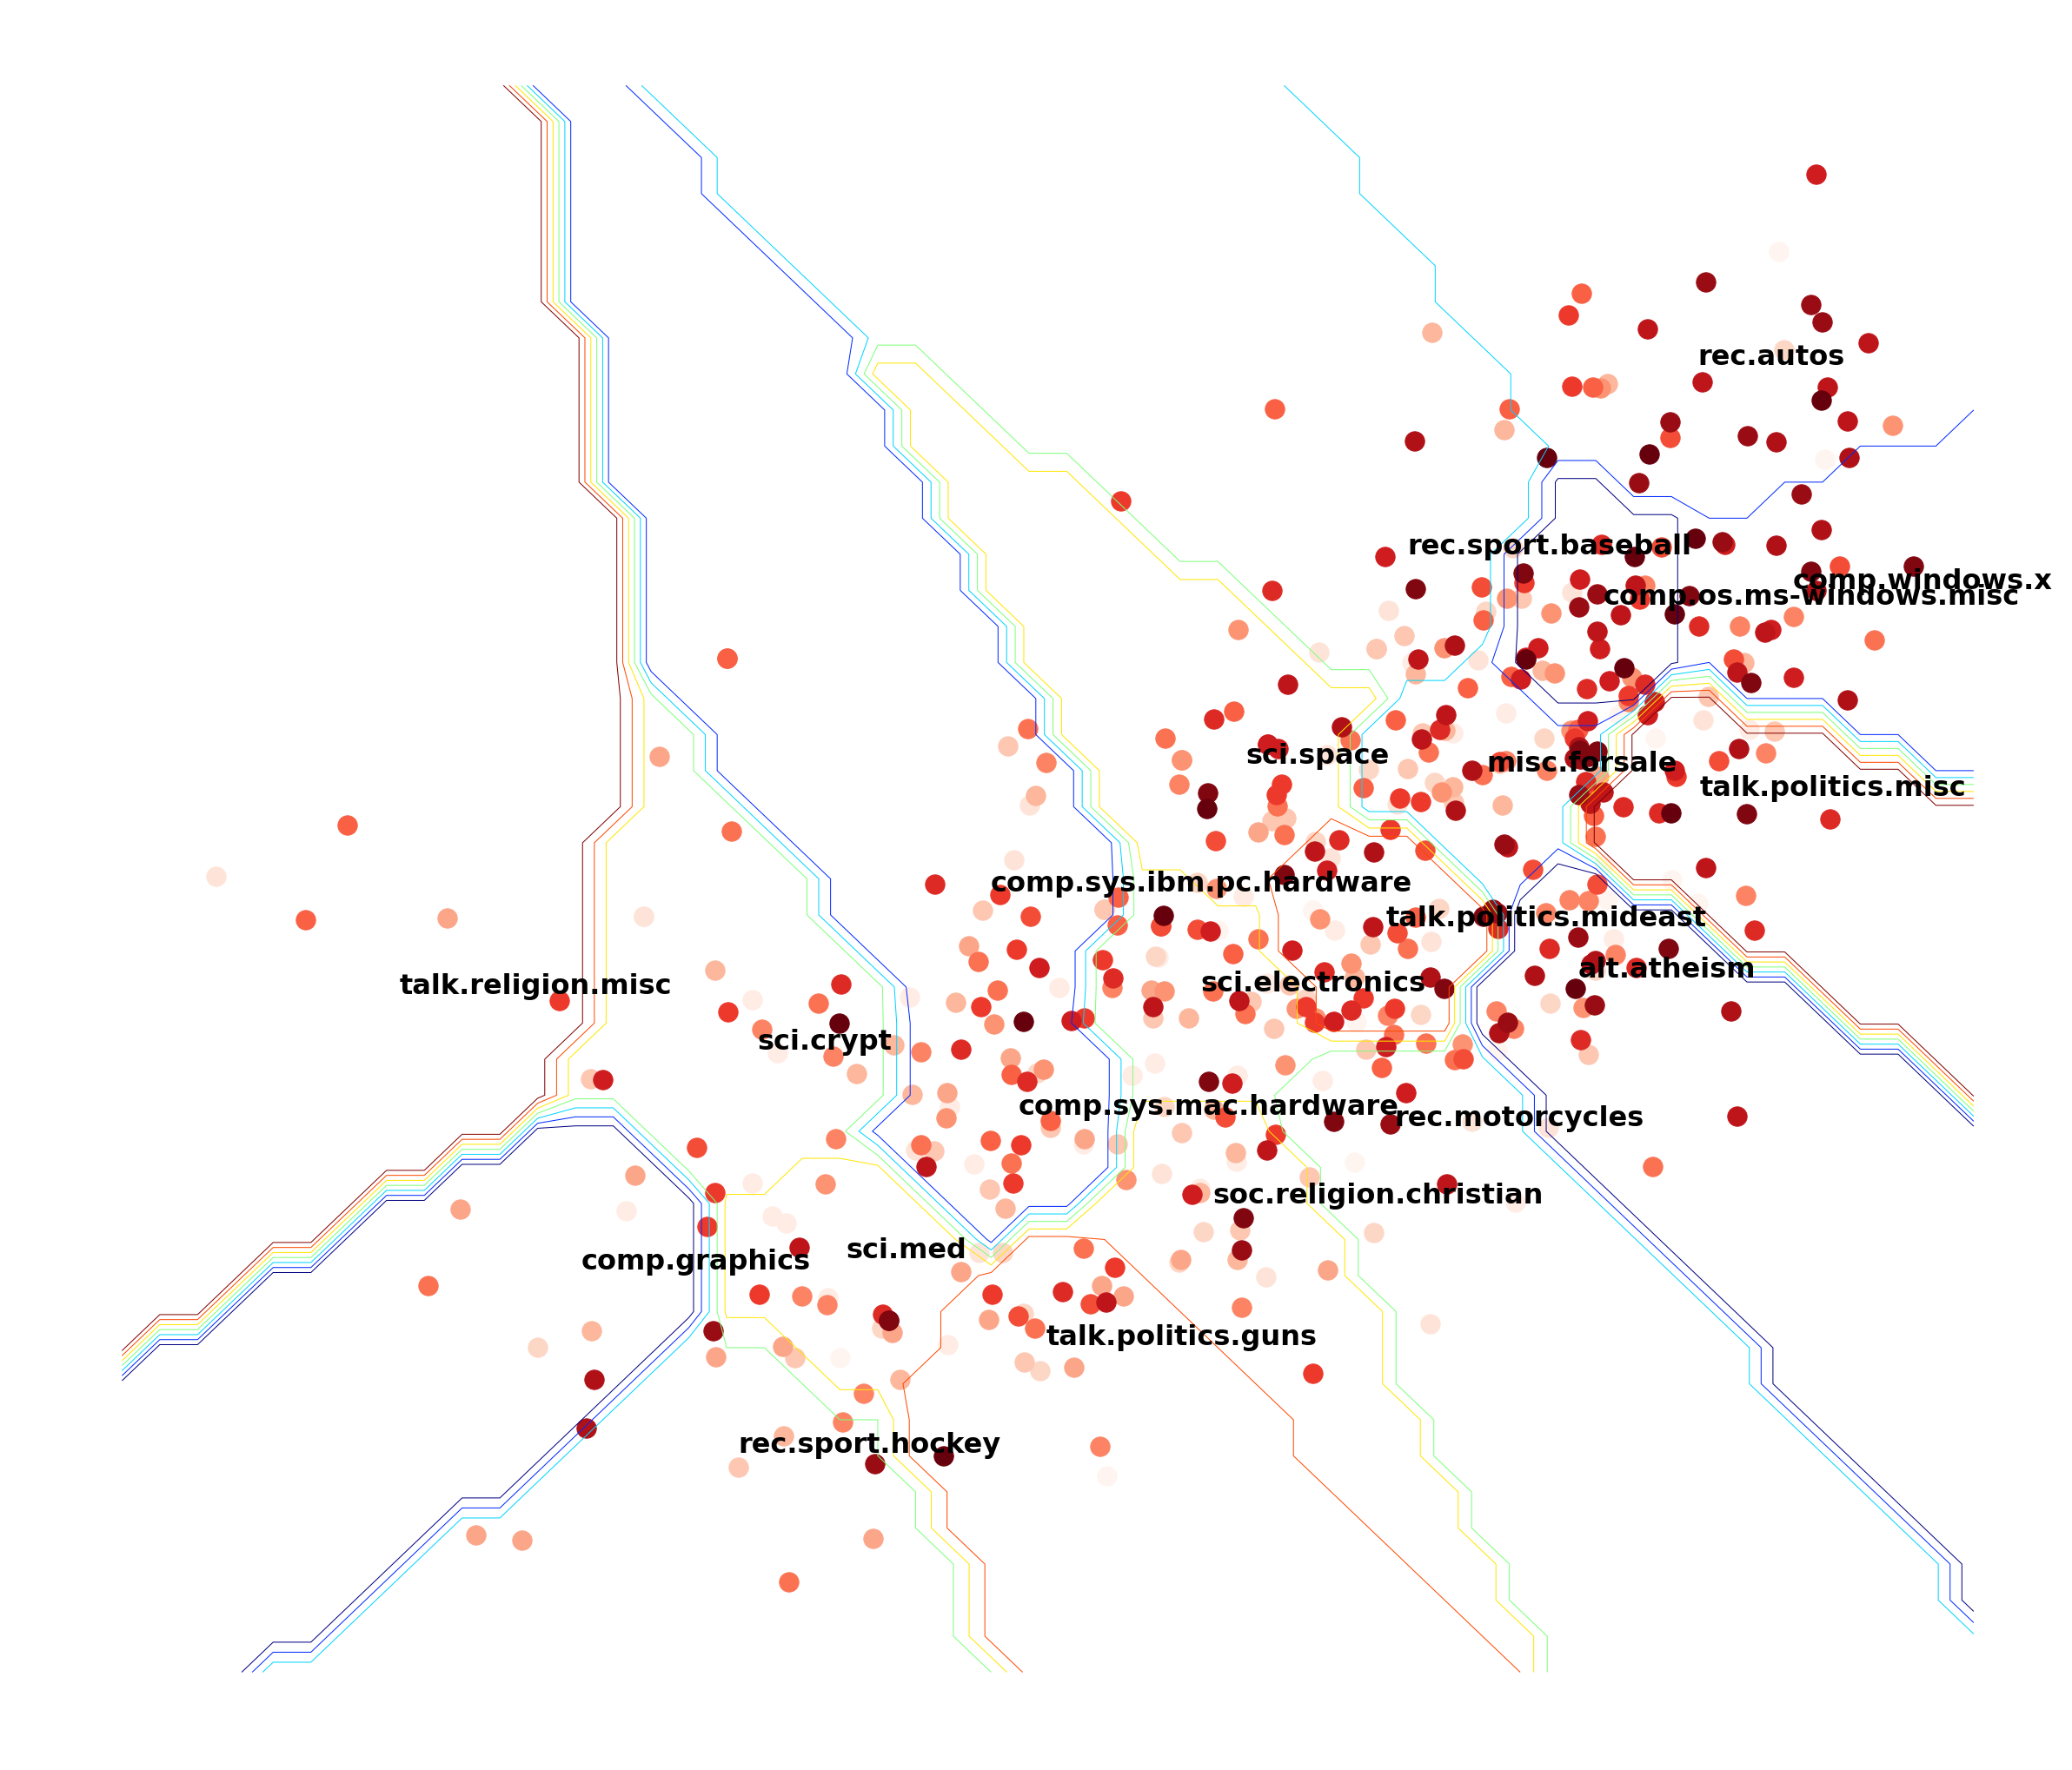

In [149]:
import matplotlib.cm as cm

x_min, x_max = data_fragment[:, 0].min() - 0.05, data_fragment[:, 0].max() + 0.05
y_min, y_max = data_fragment[:, 1].min() - 0.05, data_fragment[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=[42, 36])
plt.clf()
plt.contour(xx, yy, Z)
plt.axis('off')

for n,c in zip(y_names, k_means_cluster_centers):
    plt.text(c[0], c[1], n,fontsize=32,fontweight='bold', ha='left',va='bottom',color='k')

colors = np.linspace(0, 1, len(class_labels))
reds = plt.get_cmap("Reds")

for l, c in zip(class_labels, reds(colors)):
    l_class = np.where(y_fragment == l)[0]
    plt.scatter(data_fragment[l_class, 0], data_fragment[l_class, 1], color=c, s=500)
plt.show()    